In [1]:
import os
import pandas as pd
import numpy as np
from itertools import permutations
import random
import statistics
os.chdir(r"C:\\Users\\ferre\\OneDrive\\Ambiente de Trabalho\\PSn\\")

year = [15,16,17,18,19,20,21,22]
dfs = []
for y in year:
    print ('Reading', 'FIFA' + str(y))
    df = pd.read_excel('FIFA_FCT.xlsx', sheet_name= '20' + str(y))
    dfs += [df.copy(deep =True)]
print("                          Finished reading dataset!")

Reading FIFA15
Reading FIFA16
Reading FIFA17
Reading FIFA18
Reading FIFA19
Reading FIFA20
Reading FIFA21
Reading FIFA22
                          Finished reading dataset!


In [386]:
pos_dict = {
      "LF": 0,
      "CF": 0,
      "RF": 0,
      "LM": 0,
      "CM": 0,
      "RM": 0,
      "LB": 0, 
      "LCB": 0,
      "RCB": 0,
      "RB":  0,
      "GK": 0   
}

def doPosList():
    for key in pos_dict.keys():
        pos_dict[key] = 0
        
year_dict = {
    15 : 0,
    16 : 1,
    17 : 2,
    18 : 3,
    19 : 4,
    20 : 5,
    21 : 6,
    22 : 7
}
budget = 569500000
mensal_budget = 2470000
year = 22
df_alvo = dfs[year_dict[year]]
df_alvo.drop(df_alvo.index[df_alvo['club_position'] == 'SUB'], inplace=True) #elimina todas as posicoes que nao sao usadas 
df_alvo.drop(df_alvo.index[df_alvo['club_position'] == 'RES'], inplace=True)
df_alvo.dropna( axis=0, how='any', thresh=None, subset=['value_eur'], inplace=True)
df_alvo.dropna( axis=0, how='any', thresh=None, subset=['wage_eur'] ,     inplace=True) #elimina as lines que têm NAN
df_alvo.dropna( axis=0, how='any', thresh=None, subset=['club_position'], inplace=True)
df_alvo = df_alvo.reset_index(drop=True)

df_alvo.sort_values(by='value_eur', ascending=False )
df_aux = df_alvo.filter(['value_eur','club_position'], axis=1)
df_aux = df_aux.tail(30)
min_val_player = (budget/11) * 0.1
df_alvo = df_alvo[df_alvo['value_eur'] > min_val_player] # limita o df de acordo com 10% do valor do valor do budget para nao ter de percorrer jogadores demasiado baixos 
df_alvo = df_alvo.reset_index(drop=True) # reordena o DF sem jogadores eliminados
df_alvo

,Unnamed: 0,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",92.93,93,7.80e+07,320000.0,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,NaN
1,1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92.14,92,1.20e+08,270000.0,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,NaN
2,2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91.16,91,4.50e+07,270000.0,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,NaN
3,3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91.06,91,1.29e+08,270000.0,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,NaN
4,4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91.32,91,1.26e+08,350000.0,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,3765,246145,https://sofifa.com/player/246145/ignacio-alise...,I. Aliseda,Ignacio Santiago Aliseda,"LM, CAM",71.55,82,5.50e+06,5000.0,...,48+2,48+2,48+2,56+2,17+2,https://cdn.sofifa.net/players/246/145/22_120.png,https://cdn.sofifa.net/teams/693/60.png,https://cdn.sofifa.net/flags/us.png,NaN,NaN
1209,3795,253150,https://sofifa.com/player/253150/mike-tresor-n...,M. Ndayishimiye,Mike Trésor Ndayishimiye,"CAM, LW",71.92,80,5.50e+06,11000.0,...,39+2,39+2,39+2,52+2,18+2,https://cdn.sofifa.net/players/253/150/22_120.png,https://cdn.sofifa.net/teams/673/60.png,https://cdn.sofifa.net/flags/be.png,NaN,NaN
1210,3803,255371,https://sofifa.com/player/255371/marcos-paulo-...,Marcos Paulo,Marcos Paulo Costa do Nascimento,"LM, ST",72.28,84,5.50e+06,23000.0,...,48+2,48+2,48+2,55+2,13+2,https://cdn.sofifa.net/players/255/371/22_120.png,https://cdn.sofifa.net/teams/112809/60.png,https://cdn.sofifa.net/flags/pt.png,NaN,NaN
1211,3806,256136,https://sofifa.com/player/256136/facundo-torre...,F. Torres,Facundo Daniel Torres Pérez,"LW, CAM, RW",71.71,82,5.50e+06,750.0,...,45+2,45+2,45+2,53+2,14+2,https://cdn.sofifa.net/players/256/136/22_120.png,https://cdn.sofifa.net/teams/101110/60.png,https://cdn.sofifa.net/flags/uy.png,NaN,NaN


In [387]:
def make_random_lists(): # faz 20 equipas 
    list_of_teams = []
    list_val = []
    val_per_player = budget/11 
    wage_per_player = mensal_budget/11
    for i in range(10):
        team = []
        doPosList()
        max_val = 0
        max_wage = 0
        z = 0
        while (len(team) != 11):
            player_num = random.randint(0, len(df_alvo)-1)
            #print(player_num)
            if (pos_dict[df_alvo['club_position'][player_num]] == 1):
                continue
            if(len(team) == 10): 
                resto1 = (max_val - df_alvo['value_eur'][player_num])
                resto2 = (max_wage - df_alvo['wage_eur'][player_num])
            else:
                resto1 = (val_per_player - df_alvo['value_eur'][player_num])
                resto2 = (wage_per_player - df_alvo['wage_eur'][player_num])
            if (resto1 < 0 or resto2 < 0): #se o budget dividido por 11 jogadores for maior que o custo do jogador
                if (z >= 3000):
                    pos_dict[df_alvo['club_position'][player_num]] = 1 
                    team.append(player_num)
                    max_val += df_alvo['value_eur'][player_num]
                    max_wage += df_alvo['wage_eur'][player_num]
                z=z+1
                continue
            else:
                pos_dict[df_alvo['club_position'][player_num]] = 1 
                team.append(player_num)
                max_val += df_alvo['value_eur'][player_num]
                max_wage += df_alvo['wage_eur'][player_num]
        #print(team)
        list_of_teams.append(team)
        list_val.append(max_val)
    #print(z)
    return list_of_teams

In [388]:
def avalFun(varList): # avaliar a performance de cada equipa baseado no overall e variancia
    best_score = 0
    bestSec_score = 0
    average = 0
    variance = 0
    score = 0
    i = 0
    bestPos = 0
    bestSegPos = 0
    team_tuple = []
    for team in varList:
        if type(team) is int:
            break
        for x in team:
            team_tuple.append(df_alvo['overall'][x])
        average  = sum(team_tuple) / len(team_tuple)
        variance = statistics.variance(team_tuple)
        #print('variance' + str(variance))
        score = average * 0.5 + (1 - variance) * 0.5
        if score > best_score:
            bestSec_score = best_score
            best_score = score
            bestSegPos = bestPos
            bestPos = i
        i = i + 1
    if(len(varList) > 2):
        return (bestPos,bestSegPos,best_score,bestSec_score)
    else:
        return (bestPos,best_score)

In [389]:
def aux_fun(varList):
    team_tuple=[]
    for x in varList:
        team_tuple.append(df_alvo['overall'][x])
    average  = sum(team_tuple) / len(team_tuple)
    #print ("entrei")
    variance = statistics.variance(team_tuple)
    score = average * 0.5 + (1 - variance) * 0.5
    return score

def trocaPlayers(x,y,budget): # trocar jogadores entre duas equipas
    tempEquipa1=[]
    tempEquipa2=[]
    antigoMelhorOv = aux_fun(x)
    antigoSecOv = aux_fun(y)
    ov1 = antigoMelhorOv
    ov2 = antigoSecOv
    equipaMomento = []
    equipaMomento2 = []
    for i in range(0,10,3):
        equipa1=x
        equipa2=y
        equipa1 = posJog(equipa1)
        equipa2 = posJog(equipa2)
        
        tempEquipa1[0: i+3 ] = equipa2[0: i+3 ]
        tempEquipa1[ i+3 :11] = equipa1[ i+3 :11]
        tempEquipa2[0: i+3 ] = equipa1[0: i+3 ]
        tempEquipa2[ i+3 :11] = equipa2[ i+3 :11]
        
        #parte a equipa em 3 posicoes diferentes
        
        if ((budget - teamCost(tempEquipa1)[0]) > 0):
            if ov1 < aux_fun(tempEquipa1):
                ov1 = aux_fun(tempEquipa1)
                equipaMomento = tempEquipa1.copy()
        else: continue
        if ((budget - teamCost(tempEquipa2)[0]) > 0): 
            if aux_fun(tempEquipa2) > ov2:
                ov2 = aux_fun(tempEquipa2)
                equipaMomento2 = tempEquipa2.copy()
        else: continue 

    if ov1 < antigoMelhorOv : #se a equipa comutada for melhor que a anterior, a que passa é a comutada
        if ov2 < antigoSecOv :
            return [equipaMomento, equipaMomento2];
        else:
            return [equipaMomento,y];         
    else:
        if ov2 > antigoSecOv :
            return [x, equipaMomento2];          
        else:
            return [x,y];                 

In [390]:
def teamCost2(listofPlayers): # custo de compra jogadores
    valorSave = 0
    valorSpend = 0
    for player in listofPlayers:
        valorSpend = valorSpend + df_alvo.loc[df_alvo['sofifa_id'] == player]['value_eur'].item()
    valorSave = budget - valorSpend
    return (valorSpend,valorSave)

def mensalCostFIFAID(listofplayers): #custo mensal dos jogadores
    wageSave = 0
    wageSpend = 0
    for player in listofplayers:
        wageSpend += df_alvo.loc[df_alvo['sofifa_id'] == player]['wage_eur'].item()
    wageSave = mensal_budget - wageSpend
    return (wageSpend,wageSave)


def mensalCost(listofplayers): #custo mensal dos jogadores
    wageSave = 0
    wageSpend = 0
    for player in listofplayers:
        wageSpend += df_alvo['wage_eur'][player]
    wageSave = mensal_budget - wageSpend
    return (wageSpend,wageSave)

def overallJog(team): 
    aux = []
    for player in team:
        overallJogador = df_alvo['overall'][player]
        aux.append((overallJogador,player))
    sorted_ = tuple(sorted(aux))  
    return (sorted_)

def posJog(team): 
    aux = []
    result=[]
    for player in team:
        posJogador = df_alvo['club_position'][player]
        aux.append((posJogador,player))
    sorted_ = tuple(sorted(aux)) 
    for tup in sorted_:
        result.append(tup[1])
    return (result)

def teamCost(listofPlayers): # custo de compra jogadores
    valorSave = 0
    valorSpend = 0
    for player in listofPlayers:
        valorSpend = valorSpend + df_alvo['value_eur'][player]
    valorSave = budget - valorSpend
    return (valorSpend,valorSave)

In [391]:
def conv_team(jogadores):
    jogadores_tuple = []
    for jogador in jogadores:
        jogadores_tuple.append(df_alvo.loc[df_alvo['sofifa_id'] == jogador ]['overall'].item())
    return jogadores_tuple

def calc_var(jogadores):
    lista_jog = []
    result = []
    for tup in conv_team(jogadores):
        result.append(tup)
    #print("soma dos overalls: " + str(sum(result)))
    average  = sum(result) / len(result)
    variance = statistics.variance(result)
    return (average,variance)

def display_team2(jogadores): # imprime nomes e posicao 
    listaConvocados = []
    perfilJogador= []
    for jogador in jogadores:
        perfilJogador.insert(0,(df_alvo['short_name'][jogador]))
        perfilJogador.insert(1,(df_alvo['club_position'][jogador]))
    listaConvocados.append(perfilJogador)
    return listaConvocados

def display_team(jogadores): # imprime nomes e posicao 
    listaConvocados = []
    perfilJogador= []
    for jogador in jogadores:
        perfilJogador.insert(0,(df_alvo.loc[df_alvo['sofifa_id'] == jogador ]['short_name'].item()))
        perfilJogador.insert(1,(df_alvo.loc[df_alvo['sofifa_id'] == jogador ]['club_position'].item()))
    listaConvocados.append(perfilJogador)
    return listaConvocados

In [392]:
def first_iter():
    list_best_teams=[]
    i=0
    while (i < 15):
            list_of_teams = make_random_lists() # 20 listas de 11 jogadores
            best,sec,best_OV,sec_Ov = avalFun(list_of_teams) # avalia as 20 equipa e saca as 2 melhores 
            twobest = trocaPlayers(list_of_teams[best],list_of_teams[sec],budget) #comuta players entre as duas equipas e ve se é melhor que as equipas anteriores 
            betterOne = avalFun(twobest)[0] #vai buscar a melhor equipa das duas melhores
            list_best_teams.append(twobest[betterOne]) # adiciona as 15 melhores equipas á lista
            i=i+1
    return list_best_teams

In [393]:
def second_iter(list_of_teams):
    x = 11
    save_wage = 0
    save_budget = 0
    final_team = []
    positions_occupied = []
    best,sec,best_OV,sec_Ov = avalFun(list_of_teams) # avalia as 20 equipa e saca as 2 melhores 
    twobest = trocaPlayers(list_of_teams[best],list_of_teams[sec],budget) #comuta players entre as duas equipas e ve se é melhor que as equipas anteriores 
    betterOne = avalFun(twobest)[0] #vai buscar a melhor equipa das duas melhores
    valor_para_melhorias = teamCost(twobest[betterOne])[1] # vai buscar o valor poupado para melhorar jogadores
    valor_mensal_para_melhorias = mensalCost(twobest[betterOne])[1] # vai buscar o valor mensal poupado para melhorar jogadores
    for i in overallJog(twobest[betterOne]):
        rslt_df = df_alvo[df_alvo['club_position'] == df_alvo['club_position'][i[1]]] # faz um novo df so com a posicao que se quer melhorar (GK, CM...) 
        rslt_df = rslt_df[rslt_df['overall'] > i[0]] # limita o df a jogadores com melhor overall
        rslt_df = rslt_df.reset_index(drop=True)
        rslt_df.sort_values(by='overall', ascending=False)
        novo_valor_per_player = df_alvo['value_eur'][i[1]] + valor_para_melhorias/x #novo valor para gastar no jogador  
        novo_wage_player = df_alvo['wage_eur'][i[1]] + valor_mensal_para_melhorias/x #divide-se por x para que não seja sempre um valor estatico, com o objetivo de gastar mais perto do valor 
        x = x- 1 * 0.4
        #print(x)
        for ind in rslt_df.index:
            resto = novo_valor_per_player - rslt_df['value_eur'][ind]
            resto1 = novo_wage_player - rslt_df['wage_eur'][ind]
            if ((resto > 0) and (resto1 > 0)): # se o valor do player nao ultrapassar o valor que se tem para melhorias
                valor_para_melhorias = valor_para_melhorias + resto
                valor_mensal_para_melhorias = valor_mensal_para_melhorias + resto1
                final_team.append(rslt_df['sofifa_id'][ind]) # adiciona uma team as 20 melhores teams finais
                positions_occupied.append(rslt_df['club_position'][ind]) 
                break
        if df_alvo['club_position'][i[1]] not in positions_occupied:
            final_team.append(df_alvo['sofifa_id'][i[1]])  
    return final_team

In [383]:
import matplotlib.pyplot as plt
def graph(listt,list1):
    
    team = ['Team 1','Team 2','Team 3','Team 4','Team 5']
    overall = [listt[0],listt[1],listt[2],listt[3],listt[4]]
    variance = [list1[0],list1[1],list1[2],list1[3],list1[4]]
    for index,data in enumerate(overall):
        plt.text(x=index , y =data+1 , s=f"{round(data,2)}" , fontdict=dict(fontsize=10))
    for index,data in enumerate(variance):
        plt.text(x=index , y =data+1 , s=f"{round(data,2)}" , fontdict=dict(fontsize=10))
    x_axis = np.arange(len(team))

    plt.bar(x_axis - 0.2, overall, width=0.4, label = 'overall')
    plt.bar(x_axis + 0.2, variance, width=0.4, label = 'variance')

    plt.xticks(x_axis, team)

    plt.legend()
    plt.title("Overall and Variance Comparison")
    plt.show()


In [384]:
def graph1(listt,list1):
    x = ["Team 1","Team 2","Team 3","Team 4","Team 5"]
    # first plot with X and Y data
    spend = [listt[0],listt[1],listt[2],listt[3],listt[4]]
    save = [list1[0],list1[1],list1[2],list1[3],list1[4]]

    
     # second plot with x1 and y1 data
    plt.plot(x,spend , x, save, '-.')
    
    plt.xlabel("valor €")
    plt.ylabel("Teams")
    plt.title("Teams cost comparison")
    plt.show()


42.10835286473001
[184344, 189332, 177003, 153079, 206113, 198219, 176580, 155862, 195864, 208418, 167495]


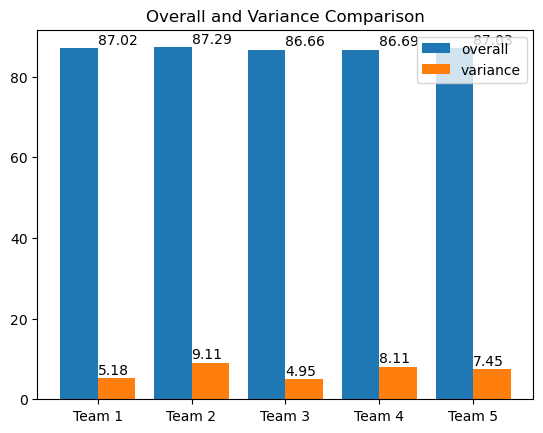

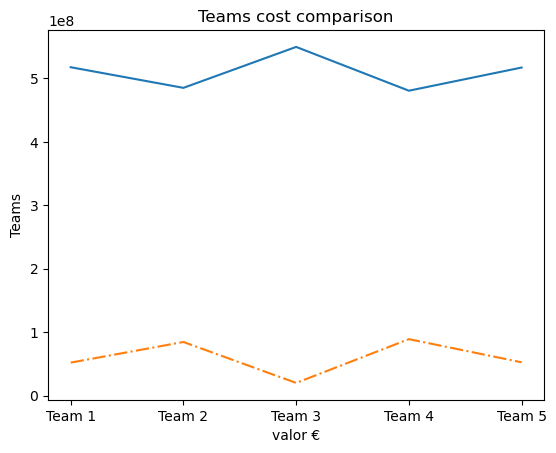

(1632000.0, 838000.0)
CPU times: total: 1.78 s
Wall time: 3.32 s


[['M. Neuer',
  'GK',
  'Y. Carrasco',
  'LM',
  'P. Pogba',
  'RB',
  'Sergio Ramos',
  'LCB',
  'L. Suárez',
  'RF',
  'L. Insigne',
  'LF',
  'S. Gnabry',
  'RM',
  'S. Agüero',
  'CF',
  'L. Modrić',
  'CM',
  'Jordi Alba',
  'LB',
  'L. Bonucci',
  'RCB']]

In [394]:
%%time
def main():
    final_team = []
    aux = []
    spend = []
    save = []
    overall=[]
    variance = []
    i = 0
    best_score = 0
    if(budget > 1380000): # 22
        #for i in range(20):
            while(i < 12):
                team = second_iter(first_iter())
                if (teamCost2(team)[1] > 0 and mensalCostFIFAID(team)[1] > 0):
                    score = calc_var(team)[0] * 0.50 +  (1 - calc_var(team)[1])* 0.50 #calculo da performance de cada equipa
                    overall.append (calc_var(team)[0])
                    variance.append(calc_var(team)[1])
                    spend.append(teamCost2(team)[0])
                    save.append(teamCost2(team)[1])
                    aux.append(score)
                    if score > best_score: 
                        best_score = score # guarda a melhor equipa das 20 melhores equipas incialmente comutadas
                        final_team = team 
                else:
                    continue
                i = i + 1 
            print(best_score)
            print(final_team)
            graph(overall,variance) # grafico de distruibuiçoes de overal e variancia
            graph1(spend,save)
            print(mensalCostFIFAID(final_team))
            return display_team(final_team)
        #average = sum(aux)/len(aux)
        #print(average)
    else: 
        print("Não dá para fazer uma equipa com os jogadores disponíveis com um budget inferior a 1380000 euros")
main()